In [44]:
import io
from pathlib import Path
import re

import fasttext
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import wordcloud

BASE_DATA_DIR = Path.cwd().parent / "data"

In [45]:
df_true = pd.read_csv(BASE_DATA_DIR / "raw" / "True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [46]:
df_fake = pd.read_csv(BASE_DATA_DIR / "raw" / "Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [47]:
df_true["is_fake"] = False
df_merged = pd.concat([df_true, df_fake])
df_merged["is_fake"].fillna(True, inplace=True)
df_merged.reset_index(drop=True, inplace=True)

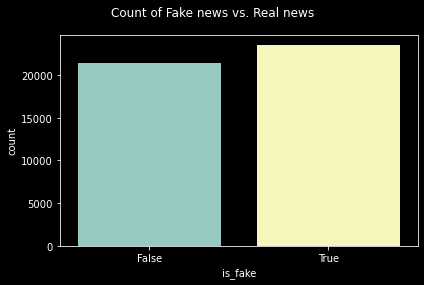

In [7]:
sns.countplot(x="is_fake", data=df_merged)
plt.suptitle("Count of Fake news vs. Real news")
plt.tight_layout()
plt.savefig(Path().cwd().parent / "figures/eda" / "is_fake_countplot.png")

<AxesSubplot:xlabel='count', ylabel='subject'>

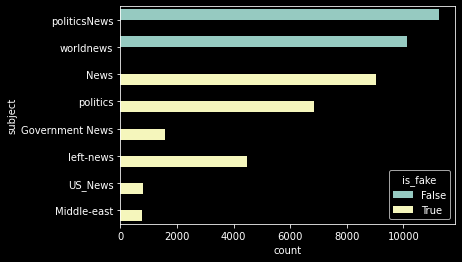

In [8]:
sns.countplot(y="subject", data=df_merged, hue="is_fake")

It doesn't seem that subjects overlap at all.

In [9]:
df_merged["num_words_text"] = df_merged["text"].str.strip().str.split().str.len()

In [10]:
df_merged["num_words_text"].describe()

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: num_words_text, dtype: float64

In [11]:
df_merged[df_merged["num_words_text"] == 0]

,title,text,subject,date,is_fake,num_words_text
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",False,0
32340,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",True,0
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",True,0
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",True,0
32642,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",True,0
...,...,...,...,...,...,...
43233,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",True,0
43243,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",True,0
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",True,0
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",True,0


<AxesSubplot:xlabel='num_words_text', ylabel='Count'>

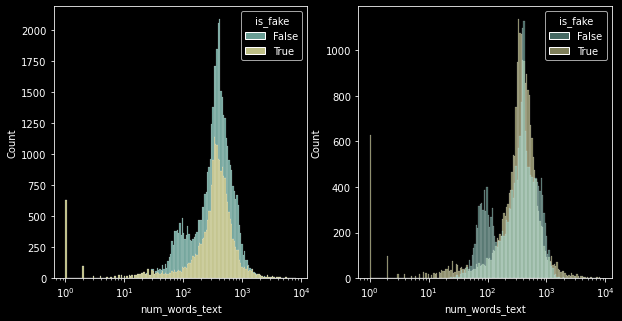

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(
    x=df_merged.num_words_text + 1,
    hue=df_merged.is_fake,
    log_scale=(True, False),
    multiple="stack",
)

plt.subplot(1, 2, 2)
sns.histplot(
    x=df_merged.num_words_text + 1,
    hue=df_merged.is_fake,
    log_scale=(True, False),
    multiple="layer",
)

In [13]:
wc_true = wordcloud.WordCloud(width=650, height=400, background_color="white").generate(
    " ".join(df_true.text)
)
wc_fake = wordcloud.WordCloud(width=650, height=400, background_color="white").generate(
    " ".join(df_fake.text)
)

'True news word cloud'

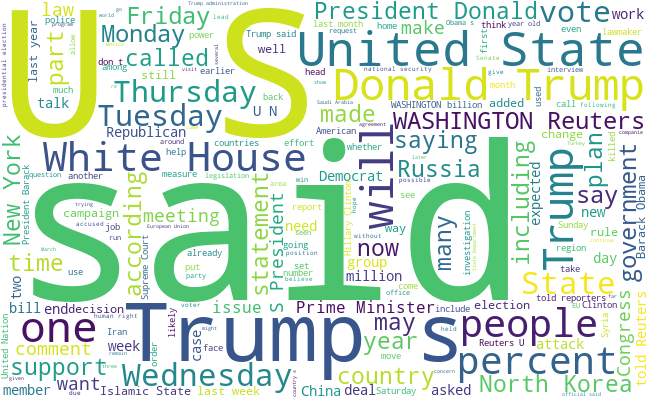

In [14]:
display("True news word cloud", wc_true.to_image())

'Fake news word cloud'

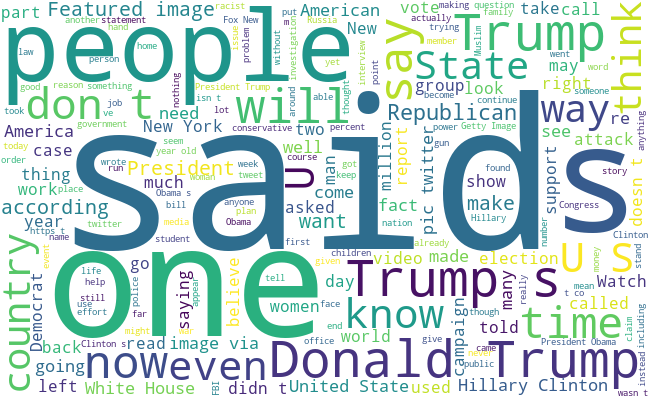

In [15]:
display("Fake news word cloud", wc_fake.to_image())

Honestly, it's hard to see something useful here. News are mostly about Donald Trump or USA in general.

In [16]:
vect_true = TfidfVectorizer(
    max_features=20,
    strip_accents="ascii",
    analyzer="word",
    lowercase=True,
    stop_words=wc_true.stopwords,
).fit(df_true.text)

/home/julius/.conda/envs/jjuoda-DL.4/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [17]:
vect_true.get_feature_names_out()

array(['election', 'government', 'house', 'last', 'new', 'one', 'people',
       'president', 'republican', 'reuters', 'said', 'state', 'states',
       'told', 'trump', 'two', 'united', 'washington', 'will', 'year'],
      dtype=object)

In [18]:
vect_fake = TfidfVectorizer(
    max_features=20,
    strip_accents="ascii",
    analyzer="word",
    lowercase=True,
    stop_words=wc_fake.stopwords,
).fit(df_fake.text)
vect_fake.get_feature_names_out()

array(['clinton', 'donald', 'even', 'hillary', 'new', 'news', 'now',
       'obama', 'one', 'people', 'president', 're', 'said', 'state',
       'time', 'trump', 'us', 'via', 'white', 'will'], dtype=object)

I see Reuters being mentioned in true news a lot. Fake news mention Hillary Clinton and Barack Obama quite a bit.

In [19]:
with pd.option_context("display.max_colwidth", None):
    print(df_true.sample(frac=1).head(5).text)

20470                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [48]:
print(
    f"True positives of 'Reuters' rule: {df_true.text.apply(lambda x: 'reuters' in x.lower()).mean():.3f}"
)

True positives of 'Reuters' rule: 0.998


In [49]:
print(
    f"False positives of 'Reuters' rule: {df_fake.text.apply(lambda x: 'reuters' in x.lower()).mean():.3f}"
)

False positives of 'Reuters' rule: 0.014


In [50]:
print(
    f"Accuracy of 'Reuters' rule: {(df_merged.text.apply(lambda x: 'reuters' not in x.lower()) == df_merged.is_fake).mean():.3f}"
)

Accuracy of 'Reuters' rule: 0.992


In [83]:
df_merged["reuters_rule"] = df_merged.text.apply(lambda x: "reuters" in x.lower())
counts = df_merged.groupby("reuters_rule").is_fake.value_counts()

In [84]:
counts = counts.reset_index(level=["reuters_rule"])
counts.columns = ["Mentions Reuters", "count"]
counts.reset_index(inplace=True)

In [85]:
counts

,is_fake,Mentions Reuters,count
0,True,False,23159
1,False,False,39
2,False,True,21378
3,True,True,322


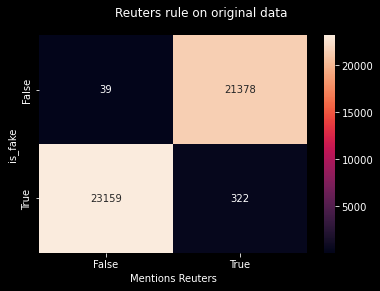

In [87]:
counts = counts.pivot(values="count", columns="Mentions Reuters", index="is_fake")
sns.heatmap(counts, annot=True, fmt="d")
plt.suptitle("Reuters rule on original data")
plt.savefig(Path().cwd().parent / "figures/eda" / "reuters_rule.png")

Seems like only reuters news were taken and if I leave that, any model will just learn to check if reuters exist in the text.

In [23]:
with pd.option_context("display.max_colwidth", None):
    print(df_fake.sample(frac=1).head(5).text)

5141                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Hm, there seems to be disconnected apostrophes and missing punctuation in general. The texts also feel more emotional. Somes "news" from Breitbart. Also feels like Twitter.

In [24]:
def drop_news_source_names(text):
    # signs of Reuters
    location_reuters_pat = r"^([A-Z/,. ]+ )?\(Reuters\) - "
    text = re.sub(location_reuters_pat, "", text, flags=re.IGNORECASE)
    reuters_in_text_pat = r"Reuters"
    text = re.sub(reuters_in_text_pat, "", text, flags=re.IGNORECASE)

    # signs of Breitbart
    breitbart_pat = r"Breitbart( News)?"
    text = re.sub(breitbart_pat, "", text, flags=re.IGNORECASE)

    # Signs of Twitter

    # I'm not sure if this needs dropping; the "news" is that Trump said something on Twitter, which is verifiably true
    # If we remove the disclaimer, what's left is Trump's tweet itself which can be false
    # I guess w/e, 4 samples in total have this disclaimer :D
    twitter_disclaimer_pat = r"^The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.  has not edited the statements or confirmed their accuracy."
    text = re.sub(twitter_disclaimer_pat, "", text, flags=re.IGNORECASE)
    twitter_replies_pat = (
        r"(\w+ \w+\s+)?"  # optional first name and last name
        r"\(@\w+\) "  # twitter handle
        r"\w+ \d+, \d+"  # date
    )
    text = re.sub(twitter_replies_pat, "", text, flags=re.IGNORECASE)
    photo_source_pat = r"Photo by \w+ \w+/Getty Images"
    text = re.sub(photo_source_pat, "", text, flags=re.IGNORECASE)
    twitter_mentions_pat = r"@\w+"
    text = re.sub(twitter_mentions_pat, "", text, flags=re.IGNORECASE)
    twitter_tags_pat = r"#\w+"
    text = re.sub(twitter_tags_pat, "", text, flags=re.IGNORECASE)
    tweet_title_pat = r"\(TWEETS?\)"
    text = re.sub(tweet_title_pat, "", text, flags=re.IGNORECASE)

    image_title_pat = r"\(IMAGE\)"
    text = re.sub(image_title_pat, "", text, flags=re.IGNORECASE)
    video_title_pat = r"\(VIDEO\)"
    text = re.sub(video_title_pat, "", text, flags=re.IGNORECASE)

    end_source_pat = r"Via: .+$"
    text = re.sub(end_source_pat, "", text)
    end_picture_pat = r"Featured Image via .*$"
    text = re.sub(end_picture_pat, "", text, flags=re.IGNORECASE)
    link_pat = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    text = re.sub(link_pat, "", text)

    return text


def clean_text(text):
    text = drop_news_source_names(text)
    text = text.strip()
    return text

In [25]:
df_merged["text"] = df_merged.text.apply(drop_news_source_names)
df_true["text"] = df_true.text.apply(drop_news_source_names)
df_fake["text"] = df_fake.text.apply(drop_news_source_names)

In [26]:
df_merged["num_words_text"] = df_merged["text"].str.strip().str.split().str.len()

In [27]:
with pd.option_context("display.max_colwidth", None):
    print(df_true.sample(frac=1).head(5).title)

2771          Republican Scalise undergoes surgery, in fair condition: hospital
4575     Russian 'propaganda on steroids' aimed at 2016 U.S. election: lawmaker
20664                 Most South Koreans doubt the North will start a war: poll
9577           Different this time? Trump candidacy could weigh on Fed thinking
9546             Puerto Rico debt bill due in 'coming days': House Speaker Ryan
Name: title, dtype: object


In [28]:
with pd.option_context("display.max_colwidth", None):
    print(df_fake.sample(frac=1).head(5).title)

6710                                                                                                                                    Christian Nutjobs: ‘Eliminate Evolution, It’s A Religion!’ Federal Court: LOL
17599    ELIZABETH WARREN FREAKS After TRUMP REFERS To Her As “Pocahontas” During WH Ceremony With Native American Code Talkers…Forgets Bill Maher Just Called Her “Pocahontas” During Appearance On His Show [VIDEO]
13911                                                                                                                                          CONGRESSMAN WRITES TELL-ALL BOOK: “I seldom read any bills I vote on.”
13543                                                                                                                                     OUTRAGEOUS PROOF That Obama Is Divorced From Reality…In A HUGE Way! [Video]
2128                                                                                                                             Trump FURIOUS A

Fake news SHOUT a lot. Also mention [VIDEO] or (VIDEO) in the title.

In [29]:
def count_all_upper_words(text):
    return sum(word.isupper() for word in text.split())


print(df_true.title.apply(count_all_upper_words).mean())
print(df_fake.title.apply(count_all_upper_words).mean())

0.38810290890414156
3.254759166986074


In [30]:
df_true.title.str.contains("VIDEO").mean()

0.0

In [31]:
df_fake.title.str.contains("VIDEO").mean()

0.2327413653592266

Can I drop "VIDEO" from title and still have enough information that this is fake news?

In [32]:
with pd.option_context("display.max_colwidth", None):
    idx = df_fake[df_fake.title.str.contains("VIDEO")].sample(frac=1).head(5).index
    print(df_fake.loc[idx, ["title", "text"]])

                                                                                                                                                                                title  \
6892                                                                                                  Watch ‘Donald Trump’ Hilariously Push Cruz To Booze On The Tonight Show (VIDEO)   
20271  BRITISH ACTRESS NAILS IT: Do you think ISIS cares about “pathetic hashtags, prayers or candles”?…”Stop waiting to be SLAUGHTERED and DEMAND our leaders DO something!” [VIDEO]   
20503                                                                                        WHOA! HISPANIC TRUMP SUPPORTERS Scream At Anti-Trump Thugs: “GO BACK TO MEXICO!” [VIDEO]   
19947                                                     WILL TRUMP PULL A “ROMNEY” In His First Debate? Says He Won’t Mention Bill’s Infidelities Unless Hillary Does This… [VIDEO]   
6421                                                                       

Easily if I keep casing. If not, emotional baggage still seems to be there, so maybe not by hard rules, but nlp model should be able to pick that up.

In [33]:
df_merged["title"] = df_merged["title"].str.replace(
    r"(\(|\[)VIDEO(\]|\))", "", regex=True, flags=re.IGNORECASE
)

In [34]:
df_merged["title"] = df_merged.title.apply(drop_news_source_names)
df_true["title"] = df_true.title.apply(drop_news_source_names)
df_fake["title"] = df_fake.title.apply(drop_news_source_names)

In [35]:
df_merged["num_words_title"] = df_merged["title"].str.strip().str.split().str.len()

In [36]:
df_merged.to_csv(BASE_DATA_DIR / "final/merged.csv", index=False)